In [52]:
import pandas as pa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
a = pa.read_csv('exams.csv'); 

In [54]:
#problématique : quel est le facteur principal permettant la réussite des étudiants lors des examens ?

In [55]:
#on calcule la moyenne de chaque éleve et on vérifie ensuite l'écart type pour voir si cette moyenne est fiable
a=a.assign(Result=a.mean(axis=1,numeric_only=True))
a.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Result
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000


In [56]:
a.Result.describe()
#l'écart type est correct par rapport au sujet

count    1000.000000
mean       67.712000
std        14.514244
min        21.666667
25%        58.583333
50%        67.333333
75%        78.333333
max       100.000000
Name: Result, dtype: float64

<AxesSubplot:xlabel='Result', ylabel='test preparation course'>

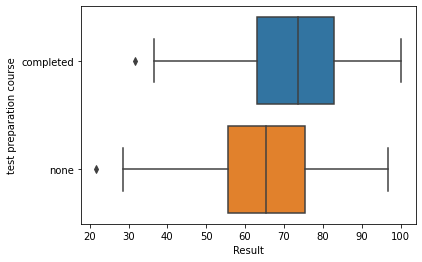

In [66]:
#on commence par voir si la préparation a une influence sur le resultat
sns.boxplot(data=a, x="Result", y="test preparation course")

<AxesSubplot:xlabel='Result', ylabel='test preparation course'>

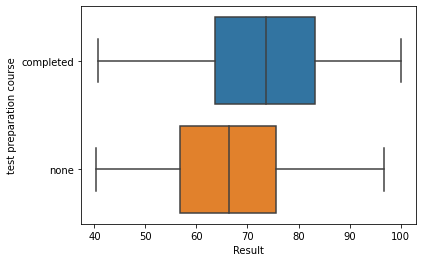

In [64]:
# boite a moustache en enlevant les valeurs abérrantes 
value = a.loc[(a['Result'] > 40)]
sns.boxplot(data=value, x="Result", y="test preparation course")
#observation : les personnes ayant révisé sont en moyenne meilleurs sur exam que les personnes qui n'ont pas révisé 

In [ ]:
#il faudra ensuite étudier d'autre facteur qui pourraient influer sur ces résultat pour tirer une conclusion finale
#nous pouvons ensuite comparer les résultat par rapport au groupe ethnique --'

In [67]:
a['race/ethnicity'] = a['race/ethnicity'].replace(to_replace=["group A","group B","group C","group D","group E"],
value=[1,2,3,4,5])

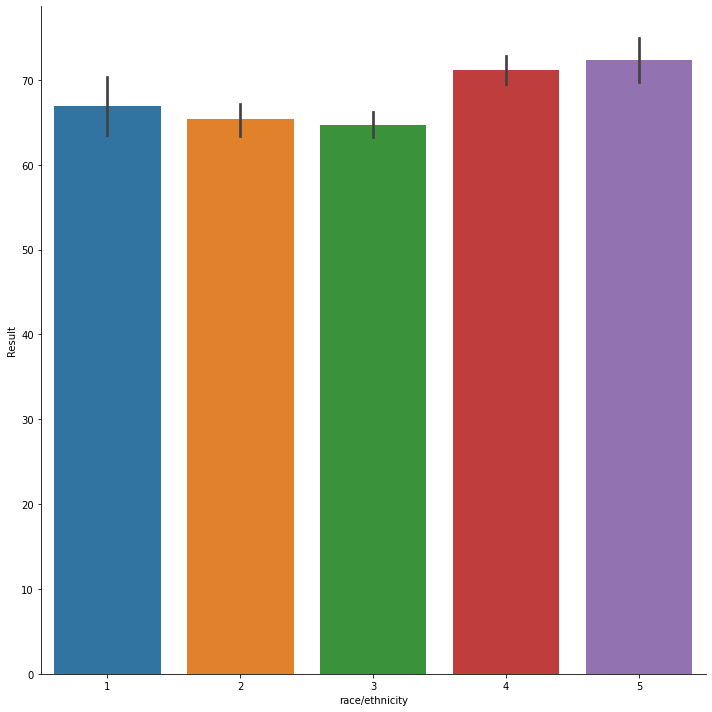

In [68]:
sns.catplot(data=a, x="race/ethnicity", y="Result",height=10, kind="bar" )
#on observe que les groupes E ET D sont plus performants que le reste